<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Wealth Distribution

One way that we might understand equality is through understanding the distribution of wealth in a society.  Perfect wealth distribution would mean that all participants have the same share of wealth as everyone else.  We can represent this situation mathematically with a function $L(x) = x$ that we will call the **Lorenz Curve**.

Concretely, if we were to look at every 20% of the population, we would see 20% of income.

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 20 |
| Lowest two - Fifths | 40 |
| Lowest three - Fifths | 60 |
| Lowest four - Fifths | 80 |
| Lowest five - Fifths | 100 |



In [ ]:
percent = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
lorenz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

Text(0.5, 1.0, 'Perfect Wealth Distribution')

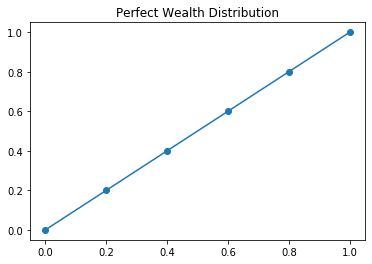

In [ ]:
plt.plot(percent, lorenz, '-o')
plt.title("Perfect Wealth Distribution")

It is unlikely that we have perfect distribution of wealth in a society however.  For example, the following table describes the cumulative distribution of income in the United States for the year 1994.  

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 4.2 |
| Lowest two - Fifths | 14.2 |
| Lowest three - Fifths | 29.9 |
| Lowest four - Fifths | 53.2 |
| Lowest five - Fifths | 100.0 |

In [ ]:
usa_94 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

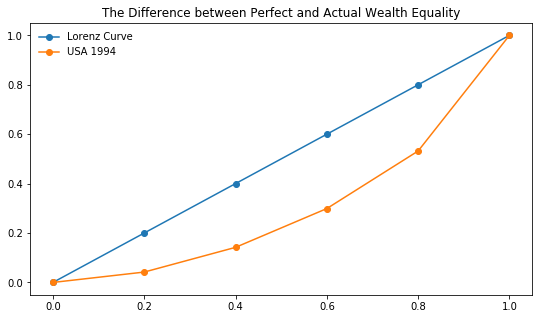

In [ ]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '-o', label = 'Lorenz Curve')
plt.plot(percent, usa_94, '-o', label = 'USA 1994')
plt.title("The Difference between Perfect and Actual Wealth Equality")
plt.legend(loc = 'best', frameon = False)

The area between these curves can be understood to represent the discrepency between perfect wealth distribution and levels of inequality.  Further, if we examine the ratio between this area and that under the **Lorenz Curve** we get the **Gini Index**.  

One big issue remains however.  We don't want to use rectangles to approximate these regions but we don't have equations for the actual distribution of wealth.  We introduce two curve fitting techniques using `numpy` to address this problem.

### Census Bureau Data and Pandas

There are many organizations that use the Gini Index to this day.  The OECD, World Bank, and US Census all track Gini Indicies.  We want to investigate the real data much as we have with our smaller examples.  To do so, we will use the Pandas library.  

The table below gives distribution data for the years 1970, 1980, 1990, and 2000.  

| x | 0.0 | 0.2 | 0.4 | 0.6 | 0.8 | 1.0 |
| --- | --- | --- | --- | --- | --- | --- |
| 1970 | 0.000 | 0.041 | 0.149 | 0.323 | 0.568 | 1.000 |
| 1980 | 0.000 | 0.042 | 0.144 | 0.312 | 0.559 | 1.000 |
| 1990 | 0.000 | 0.038 | 0.134 | 0.293 | 0.530 | 1.000 |
| 2000 | 0.000 | 0.036 | 0.125 | 0.273 | 0.503 | 1.000 |

#### Creating the DataFrame

We will begin by creating a table from this data by entering lists with these values and creating a DataFrame from these lists.  



In [ ]:
import pandas as pd
seventies = [0, 0.041, 0.149, 0.323, 0.568, 1.0]
eighties = [0, 0.042, 0.144, 0.312, 0.559, 1.0]
nineties = [0, 0.038, 0.134, 0.293, 0.53, 1.0]
twothou = [0, 0.036, 0.125, 0.273, 0.503, 1.0]

In [ ]:
df = pd.DataFrame({'1970s': seventies, '1980s':eighties, '1990s': nineties,
                  '2000s': twothou, 'perfect': [0, 0.2, 0.4, 0.6, 0.8, 1.0]})
df.head()

,1970s,1980s,1990s,2000s,perfect
0,0.000,0.000,0.000,0.000,0.0
1,0.041,0.042,0.038,0.036,0.2
2,0.149,0.144,0.134,0.125,0.4
3,0.323,0.312,0.293,0.273,0.6
4,0.568,0.559,0.530,0.503,0.8


#### Plotting from the DataFrame

We can plot directly from the dataframe.  The default plot generates lines for each decades inequality distribution.  There are many plot types available however, and we can specify them with the `kind` argument as demonstrated with the density plot that follows. What do these visualizations tell you about equality in the USA based on this data?

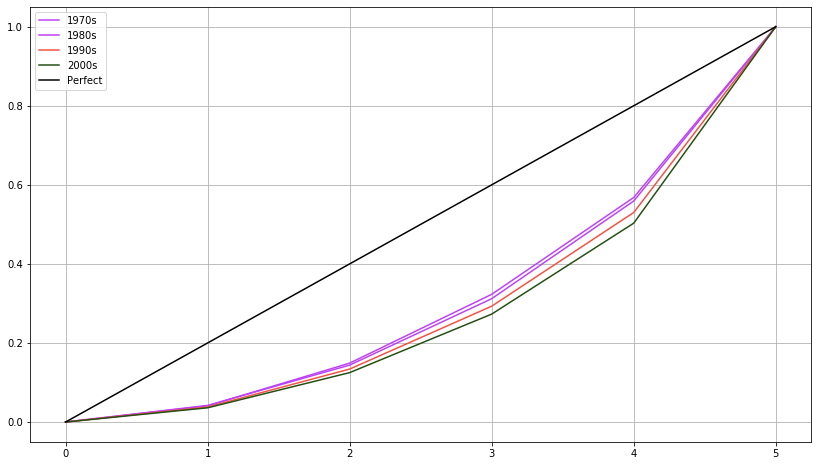

In [ ]:
plt.figure(figsize = (14, 8))
plt.plot(df['1970s'], color = '#bc42f5', label  = '1970s')
plt.plot(df['1980s'], color = '#bc42f5', label = '1980s')
plt.plot(df['1990s'], color = '#f55142', label = '1990s')
plt.plot(df['2000s'], color = '#234f11', label = '2000s')
plt.plot(df['perfect'], color = 'black', label = 'Perfect')
plt.legend()
plt.grid()

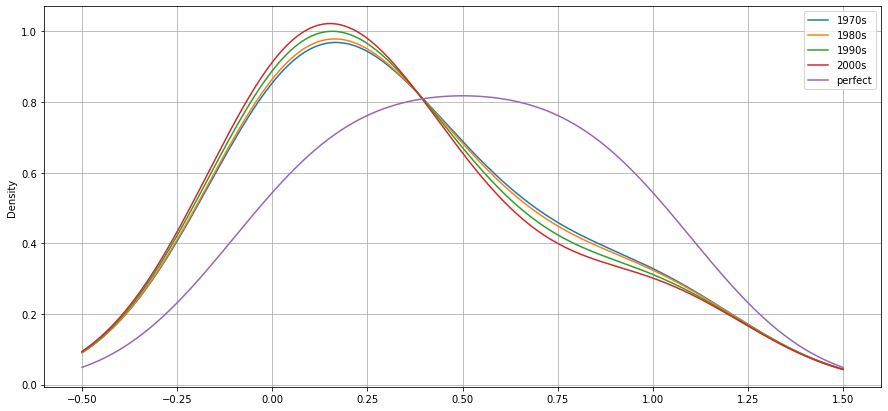

In [ ]:
df.plot(kind = 'kde', figsize = (15, 7))
plt.grid()

**PROBLEM**

Determine the gini index for the country below:

| Fraction of People | Fraction of Income |
| -----------------   | ---------------- |
| 0 | 0 |
| .2 | .05 |
| .4 | .16 |
| .6 | .33 |
| .8 | .55 |
| 1.0 | 1.0 |